In [42]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
stopWords = set(stopwords.words('english'))

In [43]:
df1 = pd.read_csv('../resources/cpj_salary_location_cleaned.csv')

In [44]:
df1=df1[["Job Title","Location","Mean_Salary","Description","Category","Skills","Tools","state"]]
df1=df1.dropna()
df1=df1.drop_duplicates()
df1=df1[df1["Mean_Salary"]!=0]
df1

,Job Title,Location,Mean_Salary,Description,Category,Skills,Tools,state
2,Junior Data Analyst,"Louisville, KY 40223",35750,Basic Function: Develop and process targeted m...,Data Analyst,Data Analysis,"SQL, R, Excel",KY
4,Marketing Data Analyst,"Sarasota, FL 34211",42500,Mercedes Scientific is a national leader in th...,Data Analyst,,R,FL
7,Power BI/Data Analyst,"Dallas-Fort Worth, TX•Temporarily Remote",95000,About our TeamThe Ethos Group IT team consists...,Data Analyst,Statistics,"SQL, R, Excel, Power BI, Tableau",TX
9,Online Data Analyst - USA,"Annapolis, MD•Remote",14500,Company Info: We help companies test and impro...,Data Analyst,,"R, AI, Machine Learning",MD
10,Online Data Analyst - USA,"New Orleans, LA•Remote",14500,Company Info: We help companies test and impro...,Data Analyst,,"R, AI, Machine Learning",LA
...,...,...,...,...,...,...,...,...
15646,Full Stack Developer (REMOTE),"Tampa, FL 33601•Remote",47500,Join us as we pursue our mission to remove the...,Business Intelligence Developer,,"Python, Spark, JavaScript, R, Cloud, HTML, CSS...",FL
15668,Data Analyst II Database developer II Entry le...,"Poway, CA•Temporarily Remote",65000,SQL Developer (Training)Responsibilities· Help...,Business Intelligence Developer,ETL,"SQL, R, Power BI, Tableau",CA
15671,Workday Business Intelligence Developer,"Las Vegas, NV 89119 (Paradise area)",80000,Workday Business Intelligence Developer\nThank...,Business Intelligence Developer,,"R, Cloud, Excel, Java",NV
15689,Data Developer,"Research Triangle Park, NC 27709",52011,TITLE: IT Data Analytics/Data Developer 1\nDut...,Business Intelligence Developer,,"SQL, R, Power BI, Tableau, Scala",NC


In [45]:
# Python
df1['Python'] = df1['Tools'].apply(lambda x: 1 if 'python' in x.lower() else 0)

# R studio 
df1['R'] = df1['Tools'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

# SQL 
df1['SQL'] = df1['Tools'].apply(lambda x: 1 if 'sql' in x.lower() else 0)

# AWS 
df1['AWS'] = df1['Tools'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

# Excel
df1['Excel'] = df1['Tools'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

# Google Cloud
df1['GCP'] = df1['Tools'].apply(lambda x: 1 if 'google cloud' in x.lower() or 'gcp' in x.lower() else 0)

# Microsoft Azure
df1['Azure'] = df1['Tools'].apply(lambda x: 1 if 'microsoft azure' in x.lower() or 'azure' in x.lower() else 0)

# Spark
df1['Spark'] = df1['Tools'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

# Tableau
df1['Tableau'] = df1['Tools'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

# Keras
df1['Keras'] = df1['Tools'].apply(lambda x: 1 if 'keras' in x.lower() else 0)

#NoSQL
df1['NoSQL'] = df1['Tools'].apply(lambda x: 1 if 'nosql' in x.lower() else 0)

#Machine Learning
df1['Machine_Learning'] = df1['Tools'].apply(lambda x: 1 if 'machine learning' in x.lower() else 0)

#Hadoop
df1['Hadoop'] = df1['Tools'].apply(lambda x: 1 if 'hadoop' in x.lower() else 0)

df1['AI'] = df1['Tools'].apply(lambda x: 1 if 'ai' in x.lower() else 0)

df1['Power_BI'] = df1['Tools'].apply(lambda x: 1 if 'power bi' in x.lower() else 0)


In [46]:
df1=df1.drop(["Skills","Tools"],axis=1)

In [47]:
# Classifying job levels into each category
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'vp' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower()or 'experienced' in title.lower() or 'iii' in title.lower() or 'research' in title.lower() or 'manager' in title.lower():
        return 'Senior'
    elif 'intermediate' in title.lower() or 'staff' in title.lower() or 'ii' in title.lower():
        return 'Mid'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'intern' in title.lower() or 'student' in title.lower()or 'associate' in title.lower():
        return 'Junior'
    else:
        return 'Not Specified'

Text(0.5, 1.0, 'Salary Distribution')

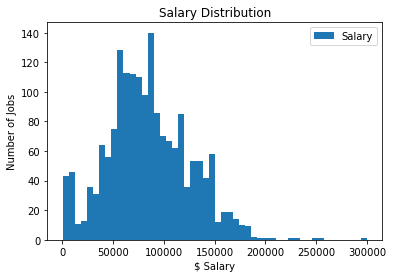

In [48]:
import matplotlib.pyplot as plt
x = list(df1.Mean_Salary)

names = ['Salary']
         
plt.hist([x], bins = 50,
         label=names)

plt.legend()
plt.xlabel('$ Salary')
plt.ylabel('Number of Jobs')
plt.title('Salary Distribution')

In [49]:
# Remove outliers
df1 = df1[50000 <= df1['Mean_Salary']]
df1 = df1[df1['Mean_Salary'] < 200000]

In [50]:
df1['Seniority'] = df1['Job Title'].apply(seniority)
# Categorize salary
# def salary_category(salary):
#     if salary<5000:
#         return 0
#     if 50000 <= salary < 75000:
#         return 1
#     if 75000 <= salary < 100000:
#         return 2
#     if 100000 <= salary < 125000:
#         return 3
#     if 125000 <= salary < 150000:
#         return 4
#     if 150000 <= salary < 175000:
#         return 5
#     if 175000 <= salary < 200000:
#         return 6
#     else:
#         return 7
# Categorize salary
def salary_category(salary):

    if salary < 100000:
        return 1
    if 100000<=salary < 150000:
        return 2
    
    if 150000<= salary < 200000:
        return 3

target = df1['Mean_Salary'].apply(salary_category)
len(target)

1456

In [51]:
df1=df1.drop("Location",axis=1)


In [52]:
df1['Description'] = df1['Description'].apply(lambda x: ' '.join(x.split()))
df1['Description'] = df1['Description'].apply(lambda x: re.sub(r'[^\w\s]','', x.lower()))
df1['Description'] = df1['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopWords]))   

In [53]:
from sklearn.model_selection import GridSearchCV
model =  RandomForestClassifier()
param_grid = {'max_depth': [3, 5, 10],
         'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(model, param_grid=param_grid)

In [54]:
df2=pd.get_dummies(df1)

X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2, random_state=42)
X_train.head(2)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [55]:
preds=grid_search.predict(X_test)
preds

array([2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1], dtype=int64)

In [56]:
def evaluate(preds, y_test, variation):
    counter = 0
    for i in range(len(preds)):
        if y_test[i]-variation <= preds[i] <= y_test[i]+variation:
            counter += 1
        else: 
            counter += 0
    accuracy = counter / len(preds) 
    return accuracy
        
evaluate(list(preds), list(y_test), 0)

0.7602739726027398

In [57]:
import pickle
with open('salary_predict_model1.pkl', 'wb') as file:
    pickle.dump(grid_search, file)

In [58]:
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

In [59]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
 # Define the model - deep neural net
number_input_features = len(X_train.columns)
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 14592     
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 14,643
Trainable params: 14,643
Non-trainable params: 0
_________________________________________________________________


In [61]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
 # Add our first Dense layer, including the input layer
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
37/37 [==============================] - 0s 1ms/step - loss: -0.5852 - accuracy: 0.5790
Epoch 2/100
37/37 [==============================] - 0s 889us/step - loss: -2.4630 - accuracy: 0.5808
Epoch 3/100
37/37 [==============================] - 0s 917us/step - loss: -5.3346 - accuracy: 0.5808
Epoch 4/100
37/37 [==============================] - 0s 917us/step - loss: -9.9669 - accuracy: 0.5808
Epoch 5/100
37/37 [==============================] - 0s 972us/step - loss: -17.0848 - accuracy: 0.5808
Epoch 6/100
37/37 [==============================] - 0s 944us/step - loss: -27.5048 - accuracy: 0.5808
Epoch 7/100
37/37 [==============================] - 0s 889us/step - loss: -41.6281 - accuracy: 0.5808
Epoch 8/100
37/37 [==============================] - 0s 917us/step - loss: -60.2949 - accuracy: 0.5808
Epoch 9/100
37/37 [==============================] - 0s 889us/step - loss: -84.3253 - accuracy: 0.5808
Epoch 10/100
37/37 [==============================] - 0s 944us/step - loss: -11